In [1]:
#Importing data
import pandas as pd

data = pd.read_csv('pollution_us_2000_2016.csv', header=0)
print(data.head())

   Unnamed: 0  State Code  County Code  Site Num  \
0           0           4           13      3002   
1           1           4           13      3002   
2           2           4           13      3002   
3           3           4           13      3002   
4           4           4           13      3002   

                                   Address    State    County     City  \
0  1645 E ROOSEVELT ST-CENTRAL PHOENIX STN  Arizona  Maricopa  Phoenix   
1  1645 E ROOSEVELT ST-CENTRAL PHOENIX STN  Arizona  Maricopa  Phoenix   
2  1645 E ROOSEVELT ST-CENTRAL PHOENIX STN  Arizona  Maricopa  Phoenix   
3  1645 E ROOSEVELT ST-CENTRAL PHOENIX STN  Arizona  Maricopa  Phoenix   
4  1645 E ROOSEVELT ST-CENTRAL PHOENIX STN  Arizona  Maricopa  Phoenix   

   Date Local          NO2 Units  ...          SO2 Units  SO2 Mean  \
0  2000-01-01  Parts per billion  ...  Parts per billion  3.000000   
1  2000-01-01  Parts per billion  ...  Parts per billion  3.000000   
2  2000-01-01  Parts per billion

In [2]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1746661 entries, 0 to 1746660
Data columns (total 29 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Unnamed: 0         int64  
 1   State Code         int64  
 2   County Code        int64  
 3   Site Num           int64  
 4   Address            object 
 5   State              object 
 6   County             object 
 7   City               object 
 8   Date Local         object 
 9   NO2 Units          object 
 10  NO2 Mean           float64
 11  NO2 1st Max Value  float64
 12  NO2 1st Max Hour   int64  
 13  NO2 AQI            int64  
 14  O3 Units           object 
 15  O3 Mean            float64
 16  O3 1st Max Value   float64
 17  O3 1st Max Hour    int64  
 18  O3 AQI             int64  
 19  SO2 Units          object 
 20  SO2 Mean           float64
 21  SO2 1st Max Value  float64
 22  SO2 1st Max Hour   int64  
 23  SO2 AQI            float64
 24  CO Units           object 
 25  CO Mean           

In [4]:
##Dropping unneccessary columns
data = data.drop(['Unnamed: 0','State Code','County Code','Site Num','Address','NO2 Units','O3 Units','SO2 Units','CO Units'],axis=1)
data.head()

,State,County,City,Date Local,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
0,Arizona,Maricopa,Phoenix,2000-01-01,19.041667,49.0,19,46,0.022500,0.040,10,34,3.000000,9.0,21,13.0,1.145833,4.2,21,NaN
1,Arizona,Maricopa,Phoenix,2000-01-01,19.041667,49.0,19,46,0.022500,0.040,10,34,3.000000,9.0,21,13.0,0.878947,2.2,23,25.0
2,Arizona,Maricopa,Phoenix,2000-01-01,19.041667,49.0,19,46,0.022500,0.040,10,34,2.975000,6.6,23,NaN,1.145833,4.2,21,NaN
3,Arizona,Maricopa,Phoenix,2000-01-01,19.041667,49.0,19,46,0.022500,0.040,10,34,2.975000,6.6,23,NaN,0.878947,2.2,23,25.0
4,Arizona,Maricopa,Phoenix,2000-01-02,22.958333,36.0,19,34,0.013375,0.032,10,27,1.958333,3.0,22,4.0,0.850000,1.6,23,NaN


In [11]:
data.isna().sum()

State                     0
County                    0
City                      0
Date Local                0
NO2 Mean                  0
NO2 1st Max Value         0
NO2 1st Max Hour          0
NO2 AQI                   0
O3 Mean                   0
O3 1st Max Value          0
O3 1st Max Hour           0
O3 AQI                    0
SO2 Mean                  0
SO2 1st Max Value         0
SO2 1st Max Hour          0
SO2 AQI              872907
CO Mean                   0
CO 1st Max Value          0
CO 1st Max Hour           0
CO AQI               873323
dtype: int64

In [14]:
data.describe()

,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
count,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,873754.000000,1.746661e+06,1.746661e+06,1.746661e+06,873338.000000
mean,1.282193e+01,2.541485e+01,1.173102e+01,2.389822e+01,2.612485e-02,3.920331e-02,1.017053e+01,3.605012e+01,1.870364e+00,4.492185e+00,9.664906e+00,7.115945,3.682177e-01,6.201067e-01,7.875026e+00,5.996595
std,9.504814e+00,1.599963e+01,7.877501e+00,1.516280e+01,1.136974e-02,1.534362e-02,4.003144e+00,1.978042e+01,2.760435e+00,7.679866e+00,6.731228e+00,11.937473,3.140231e-01,6.439361e-01,7.978844e+00,5.851836
min,-2.000000e+00,-2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.000000e+00,-2.000000e+00,0.000000e+00,0.000000,-4.375000e-01,-4.000000e-01,0.000000e+00,0.000000
25%,5.750000e+00,1.300000e+01,5.000000e+00,1.200000e+01,1.787500e-02,2.900000e-02,9.000000e+00,2.500000e+01,2.565220e-01,8.000000e-01,5.000000e+00,1.000000,1.834580e-01,2.920000e-01,0.000000e+00,2.000000
50%,1.073913e+01,2.400000e+01,9.000000e+00,2.300000e+01,2.587500e-02,3.800000e-02,1.000000e+01,3.300000e+01,9.875000e-01,2.000000e+00,8.000000e+00,3.000000,2.926250e-01,4.000000e-01,6.000000e+00,5.000000
75%,1.771364e+01,3.570000e+01,2.000000e+01,3.300000e+01,3.391700e-02,4.800000e-02,1.100000e+01,4.200000e+01,2.325000e+00,5.000000e+00,1.400000e+01,9.000000,4.666670e-01,8.000000e-01,1.300000e+01,8.000000
max,1.395417e+02,2.670000e+02,2.300000e+01,1.320000e+02,9.508300e-02,1.410000e-01,2.300000e+01,2.180000e+02,3.216250e+02,3.510000e+02,2.300000e+01,200.000000,7.508333e+00,1.990000e+01,2.300000e+01,201.000000


In [16]:
## Prepare all 4 AQIs against state and date 
dataSt = data[['State','Date Local','NO2 Mean','NO2 AQI','O3 Mean','O3 AQI','SO2 Mean','SO2 AQI','CO Mean','CO AQI']]
dataSt = dataSt.dropna(axis='rows')  # Delete rows with NAs
dataSt['Date Local'] = pd.to_datetime(dataSt['Date Local'],format='%Y-%m-%d')  # Change date from string to date value
dataSt = dataSt.groupby(['State','Date Local']).mean()  # Take mean values if there are depulicated entries
dataStGrouped = dataSt.groupby(level=0)

dataStGrouped.head()

NO2 Mean  NO2 AQI   O3 Mean  O3 AQI  SO2 Mean  SO2 AQI  \
State   Date Local                                                            
Alabama 2013-12-01  17.208333     37.0  0.013542    24.0  0.313636      1.0   
        2013-12-02  20.687500     30.0  0.009375    12.0  0.530000      3.0   
        2013-12-03  14.912500     21.0  0.008167    11.0  0.305263      3.0   
        2013-12-04   7.825000     18.0  0.011125    13.0  0.131818      1.0   
        2013-12-05   8.004762     15.0  0.010083    13.0  0.000000      1.0   
...                       ...      ...       ...     ...       ...      ...   
Wyoming 2007-01-01   3.458333      7.0  0.027500    27.0  2.433333      7.0   
        2007-01-02   4.291667     10.0  0.030000    27.0  0.658333      1.0   
        2007-01-03   1.347826      9.0  0.035708    32.0  0.769565      1.0   
        2007-01-04   0.083333      1.0  0.038750    36.0  0.733333      0.0   
        2007-01-05   0.791667      8.0  0.034083    31.0  0.541667      0.0   

                     CO Mean  CO AQI  
State   Date Local                    
Alabama 2013-12-01  0.266667     6.0  
        2013-12-02  0.400000     6.0  
        2013-12-03  0.258333     3.0  
        2013-12-04  0.116667     2.0  
        2013-12-05  0.108333     2.0  
...                      ...     ...  
Wyoming 2007-01-01  0.026316     1.0  
        2007-01-02  0.066667     1.0  
        2007-01-03  0.025000     1.0  
        2007-01-04  0.000000     0.0  
        2007-01-05  0.083333     1.0  

[235 rows x 8 columns]

In [20]:
dataSt.isna().sum()

NO2 Mean    0
NO2 AQI     0
O3 Mean     0
O3 AQI      0
SO2 Mean    0
SO2 AQI     0
CO Mean     0
CO AQI      0
dtype: int64

<AxesSubplot:>

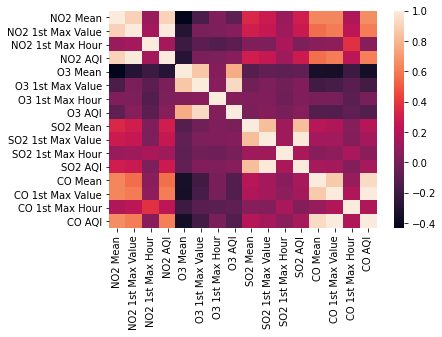

In [24]:
corr = data.corr()
sns.heatmap(corr)

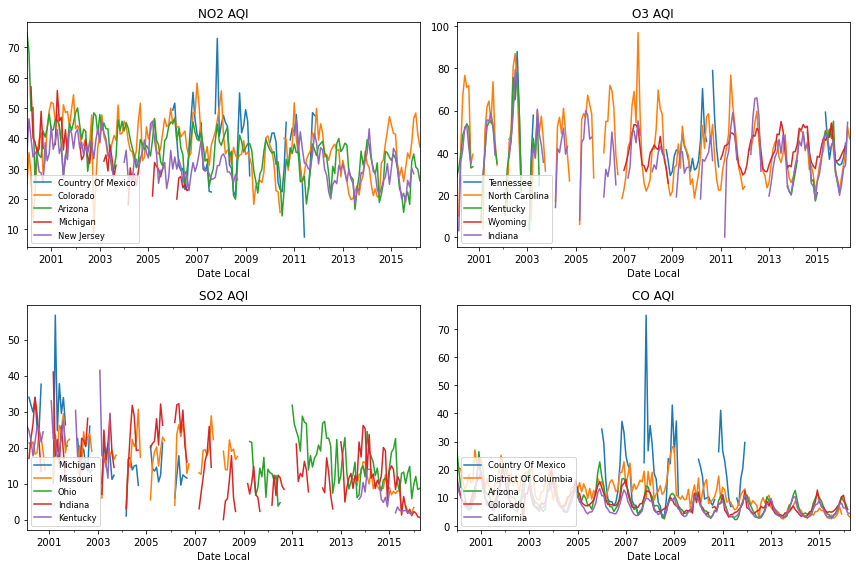

In [26]:
## Plot 4 AQIs with top 5 states
plt.figure(figsize=(12,8))

# NO2 AQI
plt.subplot(221)
dataNO2 = dataStGrouped['NO2 AQI']
dataNO2Top = dataNO2.mean().nlargest(5).index
for i in range(len(dataNO2Top)):
    dataNO2.get_group(dataNO2Top[i]).groupby(pd.Grouper(level='Date Local',freq='M')).mean().plot()
plt.legend(dataNO2Top,loc=3,fontsize='small')
plt.title('NO2 AQI')

# O3 AQI
plt.subplot(222)
dataO3 = dataStGrouped['O3 AQI']
dataO3Top = dataO3.mean().nlargest(5).index
for i in range(len(dataO3Top)):
    dataO3.get_group(dataO3Top[i]).groupby(pd.Grouper(level='Date Local',freq='M')).mean().plot()
plt.legend(dataO3Top,loc=3,fontsize='small')
plt.title('O3 AQI')

# SO2 AQI
plt.subplot(223)
dataSO2 = dataStGrouped['SO2 AQI']
dataSO2Top = dataSO2.mean().nlargest(5).index
for i in range(len(dataSO2Top)):
    dataSO2.get_group(dataSO2Top[i]).groupby(pd.Grouper(level='Date Local',freq='M')).mean().plot()
plt.legend(dataSO2Top,loc=3,fontsize='small')
plt.title('SO2 AQI')

# CO AQI
plt.subplot(224)
dataCO = dataStGrouped['CO AQI']
dataCOTop = dataCO.mean().nlargest(5).index
for i in range(len(dataCOTop)):
    dataCO.get_group(dataCOTop[i]).groupby(pd.Grouper(level='Date Local',freq='M')).mean().plot()
plt.legend(dataCOTop,loc=3,fontsize='small')
plt.title('CO AQI')

plt.tight_layout()
plt.show()